In [89]:
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', 12)
pd.set_option('display.precision', 2)
pd.set_option('display.float_format', '{:20,.2f}'.format)
plt.style.use('seaborn-v0_8')

In [90]:
df = pd.read_csv('marketing_campaign_preprocessed.csv')
df['Education'] = df['Education'].astype('category').cat.codes
df['Marital_Status'] = df['Marital_Status'].astype('category').cat.codes

df.drop('Response', axis=1, inplace=True)
df.drop('Dt_Customer', axis=1, inplace=True)

df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Age,Spending,Children
0,5524,1957,2,4,"58,138.00",0,0,58,635,88,...,0,0,0,0,0,3,11,66,1617,0
1,2174,1954,2,4,"46,344.00",1,1,38,11,1,...,0,0,0,0,0,3,11,69,27,2
2,4141,1965,2,5,"71,613.00",0,0,26,426,49,...,0,0,0,0,0,3,11,58,776,0
3,6182,1984,2,5,"26,646.00",1,0,26,11,4,...,0,0,0,0,0,3,11,39,53,1
4,5324,1981,4,3,"58,293.00",1,0,94,173,43,...,0,0,0,0,0,3,11,42,422,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,10870,1967,2,3,"61,223.00",0,1,46,709,43,...,0,0,0,0,0,3,11,56,1341,1
2198,4001,1946,4,5,"64,014.00",2,1,56,406,0,...,0,0,1,0,0,3,11,77,444,3
2199,7270,1981,2,2,"56,981.00",0,0,91,908,48,...,1,0,0,0,0,3,11,42,1241,0
2200,8235,1956,3,5,"69,245.00",0,1,8,428,30,...,0,0,0,0,0,3,11,67,843,1


# Regression

* predict Income

In [91]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(df, df['Income'], test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

model = ols('Income ~ Education + Spending + Children', X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1253.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:08:20   Log-Likelihood:                -19005.
No. Observations:                1761   AIC:                         3.802e+04
Df Residuals:                    1757   BIC:                         3.804e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.952e+04    862.607     34.226      0.000    2.78e+04    3.12e+04
Education    904.9939    250.750      3.609      0.000     413.194    1396.793
Spending      29.8215      0.547     54.556      0.000      28.749      30.894
Children    2044.7118    434.463      4.706      0.000    1192.593    2896.830
==============================================================================
Omnibus:                       91.257   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              333.709
Skew:                          -0.025   Prob(JB):                     3.44e-73
Kurtosis:                       5.132   Cond. No.                     2.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
# regression score
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")

Mean squared error: 116969476.45538092
R2 score: 0.7064528245083905


<AxesSubplot: xlabel='Income'>

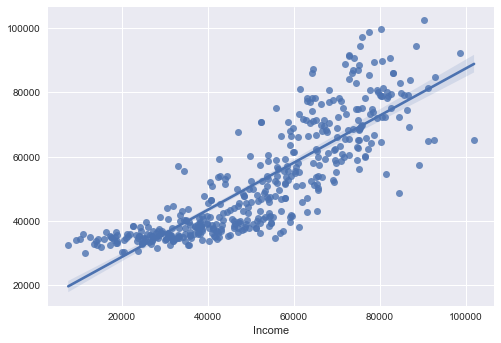

In [93]:
sns.regplot(x=y_test, y=y_pred, fit_reg=True)

# Second order polynomial

In [95]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

model = ols('Income ~ Education + Spending + Children + Income:Education + Income:Spending + Income:Children', X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.884
Method:                 Least Squares   F-statistic:                     2240.
Date:                Fri, 21 Apr 2023   Prob (F-statistic):               0.00
Time:                        01:08:55   Log-Likelihood:                -18111.
No. Observations:                1761   AIC:                         3.624e+04
Df Residuals:                    1754   BIC:                         3.627e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          4.27e+04    572.175     74.636      0.000    4.16e+04    4.38e+04
Education        -8046.5020    358.602    -22.439      0.000   -8749.835   -7343.169
Spending            -8.7379      1.467     -5.954      0.000     -11.616      -5.860
Children         -1.134e+04    651.717    -17.404      0.000   -1.26e+04   -1.01e+04
Income:Education     0.1668      0.006     27.288      0.000       0.155       0.179
Income:Spending      0.0003   1.91e-05     15.082      0.000       0.000       0.000
Income:Children      0.2572      0.012     22.233      0.000       0.234       0.280
==============================================================================
Omnibus:                      186.498   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.991
Skew:                          -0.457   Prob(JB):                    1.12e-159
Kurtosis:                       6.023   Cond. No.                     2.72e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.72e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Mean squared error: 43810400.87251364
R2 score: 0.8900532017155155


<AxesSubplot: xlabel='Income'>

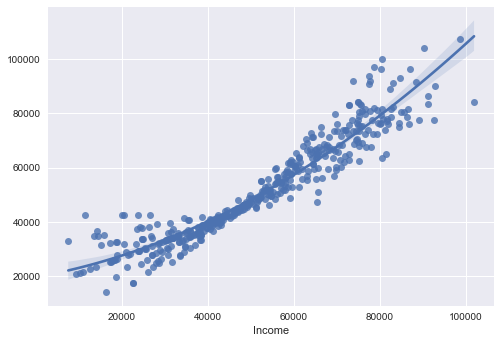

In [99]:
y_pred = model.predict(X_test)

print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 score: {r2_score(y_test, y_pred)}")
sns.regplot(x=y_test, y=y_pred, fit_reg=True, order=2)